### Import libraries

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as n
import scipy.stats
import statsmodels.api as sm

### Loading the Dataset into Jupyter Notebook

In [ ]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [18]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Median Values of Owner-Occupied Homes

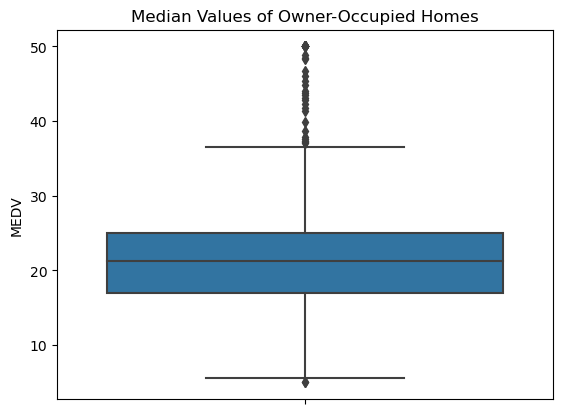

In [19]:
sns.boxplot(y='MEDV', data=boston_df)
plt.title("Median Values of Owner-Occupied Homes");

### Histogram for the Charles River variable

In [ ]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.title("Charles River Variable");


### Boxplot for the MEDV variable vs the AGE variable - Discretize the age variable into three groups of 35 years and younger, between 35 and 50 years and older


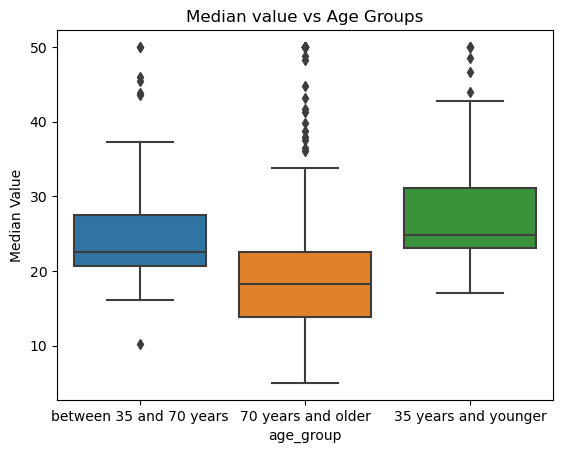

In [12]:
boston_df.loc[(boston_df.AGE <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[((boston_df.AGE > 35)&(boston_df.AGE < 70)), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df.AGE >= 70), 'age_group'] = '70 years and older'
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title("Median value vs Age Groups")
plt.ylabel("Median Value");

### Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town


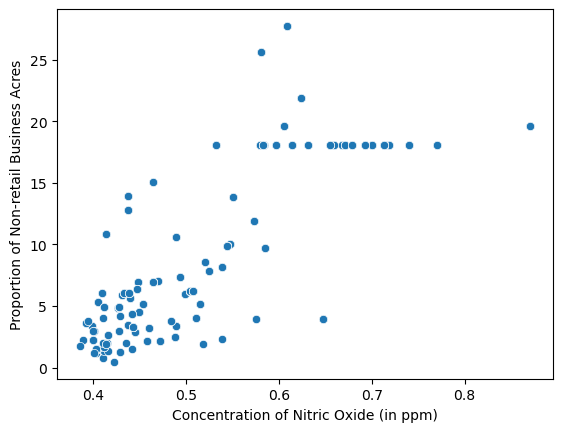

In [13]:
ax = sns.scatterplot(y='INDUS', x='NOX', data=boston_df)
plt.xlabel("Concentration of Nitric Oxide (in ppm)")
plt.ylabel("Proportion of Non-retail Business Acres");


###  The Relationship Between Nitric Oxide Concentrations and the Proportion of Non-retail Business Acres per Town

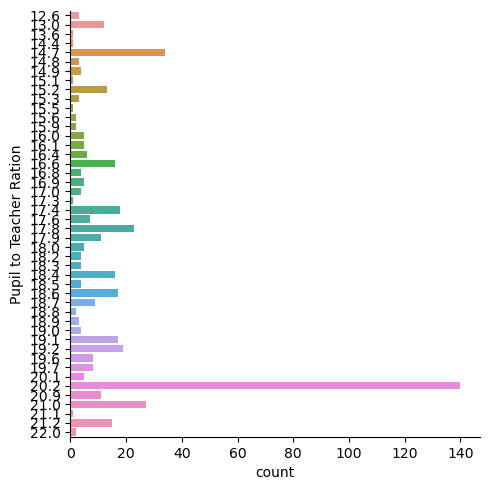

In [14]:
sns.catplot(y="PTRATIO", kind="count", data=boston_df)
plt.ylabel("Pupil to Teacher Ration");

### Histogram for the Pupil to Teacher Ratio Variable

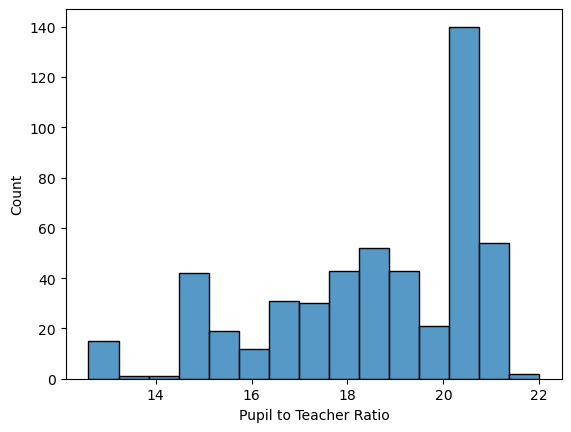

In [16]:
sns.histplot(boston_df.PTRATIO, kde=False, bins=15)
plt.xlabel("Pupil to Teacher Ratio");

### Questions

#### Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null Hypothesis -> There's no significant difference in median value between houses bounded and not bounded by the Charles River

Alternative Hypothesis -> There's a significant difference in median value between houses bounded and not bounded by the Charles Rive


In [27]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_T'] = 'FAR'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_T'] = 'NEAR'
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CHAS_T
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,FAR
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,FAR
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,FAR
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,FAR
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,FAR
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7,FAR
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9,FAR
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1,FAR
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5,FAR
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9,FAR


In [28]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV'], boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV'], equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

We reject the Null Hypothesis because the p-value is less than 0.05. There is not a statistical difference in median value betwenn houses near the Charles River and houses far away

#### Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null Hypotesis: There isn't statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

Alternative Hypothesis: There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

In [34]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


We fail to accept the Null Hypothesis because the p-value is less than 0.05. That means there is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

#### Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null Hypothesis: Nitric Oxide concentration is not correlated with the proportion of non-retail business acres per town

Alternative Hypothesis: Nitric Oxide concentration is correlated with the proportion of non-retail business acres per town

In [35]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

We reject the Null Hypothesis as there is a positive correlation between Nitric oxide concentration and proportion of non-retail business acres per town. The Pearson Coefficient is 0.76365 and p-value less than 0.05.


#### Question 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [36]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           1.21e-08
Time:                        01:53:35   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""